<a href="https://colab.research.google.com/github/fcordoba16/Franco-C-rdoba---Comisi-n-25262---TPI-Data-Analytics/blob/main/Franco-Cordoba-Comision-25262-TPI-Data-Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [121]:
#Importar Pandas y Numpy
import pandas as pd
import numpy as np

In [122]:
#Montar la unidad
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [123]:
#Verificar que los archivos csv estén en la carpeta datasets
import os
os.listdir("/content/drive/MyDrive/datasets")


['ventas.csv',
 'clientes.csv',
 'marketing.csv',
 'dataset_final.csv',
 'marketing_limpio.csv',
 'clientes_limpio.csv',
 'ventas_limpio.csv']

In [124]:
#Definir las rutas de los datasets
ruta_ventas = "/content/drive/MyDrive/datasets/ventas.csv"
ruta_clientes = "/content/drive/MyDrive/datasets/clientes.csv"
ruta_marketing = "/content/drive/MyDrive/datasets/marketing.csv"

In [125]:
#Cargar los CSV como dataframes
df_ventas = pd.read_csv(ruta_ventas)
df_clientes = pd.read_csv(ruta_clientes)
df_marketing = pd.read_csv(ruta_marketing)

In [126]:
#Ver las primeras 5 filas de cada dataframe
display(df_ventas.head(3))
display(df_clientes.head(3))
display(df_marketing.head(3))

,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,$69.94,5.0,02/01/2024,Decoración
1,811,Lámpara de mesa,$105.10,5.0,02/01/2024,Decoración
2,1156,Secadora,$97.96,3.0,02/01/2024,Electrodomésticos


,id_cliente,nombre,edad,ciudad,ingresos
0,1,Aloysia Screase,44,Mar del Plata,42294.68
1,2,Kristina Scaplehorn,25,Posadas,24735.04
2,3,Filip Castagne,50,Resistencia,35744.85


,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,20/03/2024,03/05/2024
1,12,Tablet,RRSS,3.40,26/03/2024,13/05/2024
2,32,Lámpara de mesa,Email,5.54,28/03/2024,20/04/2024


In [127]:
#Exploratory data analysis (EDA)

#Definir función eda
def eda(df, nombre):
    print(f"----- {nombre} -----")

    #Mostrar el tamaño del dataframe (filas, columnas)
    print("shape:", df.shape)

    #Listar los nombres de las columnas
    print("columnas:", list(df.columns))

    #Mostrar e imprimir el tipo de dato de cada columna (numérico, texto, fecha, etc.)
    print("dtypes:")
    print(df.dtypes)

    #Indicar cuántos valores vacíos hay por columna
    print("\nNulos por columna:")
    print(df.isna().sum())

    #Mostrar las primeras 5 filas para tener una vista rápida de los datos
    print("\nPrimeras filas:")
    display(df.head(5))

    #Dar estadísticas básicas (promedio, desvío, mínimo, máximo, etc.) solo de las columnas numéricas.
    print("\nDescribe (numérico):")
    display(df.describe(include='number'))
    print("-"*100)



In [128]:
#Ejecutar la función para dataframe ventas
eda(df_ventas, "Ventas 2024 (inicial)")

----- Ventas 2024 (inicial) -----
shape: (3035, 6)
columnas: ['id_venta', 'producto', 'precio', 'cantidad', 'fecha_venta', 'categoria']
dtypes:
id_venta         int64
producto        object
precio          object
cantidad       float64
fecha_venta     object
categoria       object
dtype: object

Nulos por columna:
id_venta       0
producto       0
precio         2
cantidad       2
fecha_venta    0
categoria      0
dtype: int64

Primeras filas:


,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,$69.94,5.0,02/01/2024,Decoración
1,811,Lámpara de mesa,$105.10,5.0,02/01/2024,Decoración
2,1156,Secadora,$97.96,3.0,02/01/2024,Electrodomésticos
3,1372,Heladera,$114.35,8.0,02/01/2024,Electrodomésticos
4,1546,Secadora,$106.21,4.0,02/01/2024,Electrodomésticos



Describe (numérico):


,id_venta,cantidad
count,3035.000000,3033.000000
mean,1499.851400,6.496538
std,866.465379,3.457250
min,1.000000,1.000000
25%,748.500000,3.000000
50%,1502.000000,7.000000
75%,2249.500000,9.000000
max,3000.000000,12.000000


----------------------------------------------------------------------------------------------------


In [129]:
#Ejecutar la función para dataframe clientes
eda(df_clientes, "Clientes 2024 (inicial)")

----- Clientes 2024 (inicial) -----
shape: (567, 5)
columnas: ['id_cliente', 'nombre', 'edad', 'ciudad', 'ingresos']
dtypes:
id_cliente      int64
nombre         object
edad            int64
ciudad         object
ingresos      float64
dtype: object

Nulos por columna:
id_cliente    0
nombre        0
edad          0
ciudad        0
ingresos      0
dtype: int64

Primeras filas:


,id_cliente,nombre,edad,ciudad,ingresos
0,1,Aloysia Screase,44,Mar del Plata,42294.68
1,2,Kristina Scaplehorn,25,Posadas,24735.04
2,3,Filip Castagne,50,Resistencia,35744.85
3,4,Liuka Luard,39,Bahía Blanca,27647.96
4,5,Dore Cockshtt,28,Rosario,28245.65



Describe (numérico):


,id_cliente,edad,ingresos
count,567.000000,567.000000,567.000000
mean,284.000000,37.940035,34668.739012
std,163.823075,10.202885,12974.531446
min,1.000000,20.000000,170.290000
25%,142.500000,30.000000,26015.240000
50%,284.000000,37.000000,35066.830000
75%,425.500000,43.000000,42457.100000
max,567.000000,81.000000,88053.010000


----------------------------------------------------------------------------------------------------


In [130]:
#Ejecutar la función para dataframe marketing
eda(df_marketing, "Marketing 2024 (inicial)")

----- Marketing 2024 (inicial) -----
shape: (90, 6)
columnas: ['id_campanha', 'producto', 'canal', 'costo', 'fecha_inicio', 'fecha_fin']
dtypes:
id_campanha       int64
producto         object
canal            object
costo           float64
fecha_inicio     object
fecha_fin        object
dtype: object

Nulos por columna:
id_campanha     0
producto        0
canal           0
costo           0
fecha_inicio    0
fecha_fin       0
dtype: int64

Primeras filas:


,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,20/03/2024,03/05/2024
1,12,Tablet,RRSS,3.40,26/03/2024,13/05/2024
2,32,Lámpara de mesa,Email,5.54,28/03/2024,20/04/2024
3,21,Smartphone,RRSS,6.37,29/03/2024,16/05/2024
4,58,Alfombra,Email,4.25,31/03/2024,05/05/2024



Describe (numérico):


,id_campanha,costo
count,90.000000,90.000000
mean,45.500000,4.928667
std,26.124701,0.947750
min,1.000000,2.950000
25%,23.250000,4.372500
50%,45.500000,4.900000
75%,67.750000,5.562500
max,90.000000,7.390000


----------------------------------------------------------------------------------------------------


In [131]:
#Calidad de datos: identificar valores nulos y duplicados


def calidad(df, nombre, clave=None):

#Identificar qué conjunto de datos se está analizando.
  print(f"### {nombre}")

#Mostrar cuántos valores vacíos tiene cada columna.
  display(df.isna().sum().to_frame("nulos"))

#Detectar filas duplicadas idénticas (todas las columnas idénticas)
  dup_rows = df.duplicated(keep=False).sum()
  print("Filas duplicadas (exactas):", dup_rows)

#Revisar si hay valores duplicados en columna indicada y contarlos
  if clave and clave in df.columns:
      dup_key = df[clave].duplicated(keep=False).sum()
      print(f"Duplicados por clave '{clave}':", dup_key)

#Mostrar los valores más repetidos. Si existen valores duplicados, mostrar los 10 más repetidos en la columna clave

  if clave and clave in df.columns:
    dup_key = df[clave].duplicated(keep=False).sum()
    print(f"Duplicados por clave '{clave}':", dup_key)

    if dup_key > 0:
        duplicados_ordenados = (
            df[df[clave].duplicated(keep=False)][clave]
            .value_counts()
            .sort_values(ascending=False)
        )

        print("\n🔁 Top valores duplicados más frecuentes:")
        display(duplicados_ordenados.head(10))
    else:
        print(f"No se encontraron duplicados en la clave '{clave}'.")
  else:
    # Si la clave no fue pasada o no existe en el DataFrame
    if clave:
        print(f"La clave '{clave}' no existe en el DataFrame.")
    else:
        print("No se indicó una clave para analizar duplicados por columna.")

In [132]:
#Ejecutar código de calidad para dataframe ventas con columna "id_venta"
calidad(df_ventas, "Ventas", clave="id_venta")

### Ventas


,nulos
id_venta,0
producto,0
precio,2
cantidad,2
fecha_venta,0
categoria,0


Filas duplicadas (exactas): 70
Duplicados por clave 'id_venta': 70
Duplicados por clave 'id_venta': 70

🔁 Top valores duplicados más frecuentes:


,count
id_venta,
56,2
421,2
424,2
1868,2
2545,2
2778,2
145,2
300,2
439,2


In [133]:
#Ejecutar código de calidad para dataframe clientes con columna "id_cliente"
calidad(df_clientes, "Clientes", clave="id_cliente")

### Clientes


,nulos
id_cliente,0
nombre,0
edad,0
ciudad,0
ingresos,0


Filas duplicadas (exactas): 0
Duplicados por clave 'id_cliente': 0
Duplicados por clave 'id_cliente': 0
No se encontraron duplicados en la clave 'id_cliente'.


In [134]:
#Ejecutar código de calidad para dataframe marketing con columna "id_campanha"
calidad(df_marketing, "Márketing", clave="id_campanha")

### Márketing


,nulos
id_campanha,0
producto,0
canal,0
costo,0
fecha_inicio,0
fecha_fin,0


Filas duplicadas (exactas): 0
Duplicados por clave 'id_campanha': 0
Duplicados por clave 'id_campanha': 0
No se encontraron duplicados en la clave 'id_campanha'.


In [135]:
#Limpieza del dataset

#Crear copia de los dataframes para no sobreescribir los archivos originales
ventas_limpio = df_ventas.copy()
clientes_limpio = df_clientes.copy()
marketing_limpio = df_marketing.copy()

#Eliminar filas completamente duplicadas

ventas_limpio = ventas_limpio.drop_duplicates()
clientes_limpio = clientes_limpio.drop_duplicates()
marketing_limpio = marketing_limpio.drop_duplicates()

In [136]:
calidad(ventas_limpio, "Ventas Limpio", clave="id_venta")

### Ventas Limpio


,nulos
id_venta,0
producto,0
precio,2
cantidad,2
fecha_venta,0
categoria,0


Filas duplicadas (exactas): 0
Duplicados por clave 'id_venta': 0
Duplicados por clave 'id_venta': 0
No se encontraron duplicados en la clave 'id_venta'.


In [137]:
df_ventas.value_counts(subset=["id_venta","producto","precio","cantidad"], dropna=False).sort_values(ascending=False)

,,,,count
id_venta,producto,precio,cantidad,
1784,Aspiradora,$115.24,3.0,2
959,Lámpara de mesa,$76.32,7.0,2
2778,SmartWatch,$70.66,7.0,2
398,Rincón de plantas,$77.30,7.0,2
2080,Consola de videojuegos,$100.69,7.0,2
...,...,...,...,...
2960,Consola de videojuegos,$87.02,11.0,1
2961,Parlantes Bluetooth,$29.97,3.0,1
2962,Televisor,$118.65,5.0,1


In [138]:
def normalizar_texto(df):
    for col in df.select_dtypes(include="object").columns:
        df[col] = (
            df[col]
            .astype(str)                      # A texto
            .str.strip()                      # Quita espacios al inicio y final
            .str.replace(r"[\u200b\t\r\n]", "", regex=True)  # Elimina caracteres invisibles
            .str.replace(" +", " ", regex=True)               # Reduce espacios múltiples
            .str.title()                      # Formato título ("juan pérez" → "Juan Pérez")
        )
    return df

In [139]:
# Normalizar columnas de fechas
for df in [ventas_limpio, clientes_limpio, marketing_limpio]:
    for col in df.columns:
        if "fecha" in col.lower():  # Busca columnas que contengan "fecha"
            df[col] = pd.to_datetime(df[col], errors="coerce", dayfirst=True)
            # Convierte a datetime; valores inválidos → NaT; formato día/mes/año

In [140]:
#Normalizar fechas de df marketing

marketing_limpio["fecha_inicio"] = pd.to_datetime(marketing_limpio["fecha_inicio"], errors="coerce", dayfirst=True)
marketing_limpio["fecha_fin"] = pd.to_datetime(marketing_limpio["fecha_fin"], errors="coerce", dayfirst=True)

In [141]:
print(ventas_limpio.dtypes)
print(clientes_limpio.dtypes)
print(marketing_limpio.dtypes)

id_venta                int64
producto               object
precio                 object
cantidad              float64
fecha_venta    datetime64[ns]
categoria              object
dtype: object
id_cliente      int64
nombre         object
edad            int64
ciudad         object
ingresos      float64
dtype: object
id_campanha              int64
producto                object
canal                   object
costo                  float64
fecha_inicio    datetime64[ns]
fecha_fin       datetime64[ns]
dtype: object


In [142]:
#Aplicar la normalización de texto

ventas_limpio = normalizar_texto(ventas_limpio)
clientes_limpio = normalizar_texto(clientes_limpio)
marketing_limpio = normalizar_texto(marketing_limpio)

In [143]:
#Mostrar los df luego de normalizar los textos para revisar que queden bien
print(ventas_limpio.head(10))
print(clientes_limpio.head(10))
print(marketing_limpio.head(10))

   id_venta           producto   precio  cantidad fecha_venta  \
0       792  Cuadro Decorativo   $69.94       5.0  2024-01-02   
1       811    Lámpara De Mesa  $105.10       5.0  2024-01-02   
2      1156           Secadora   $97.96       3.0  2024-01-02   
3      1372           Heladera  $114.35       8.0  2024-01-02   
4      1546           Secadora  $106.21       4.0  2024-01-02   
5      1697    Horno Eléctrico   $35.35       9.0  2024-01-02   
6      1710   Plancha De Vapor   $65.43       2.0  2024-01-02   
7      2959          Proyector   $88.17       9.0  2024-01-02   
8       318  Rincón De Plantas   $79.86      11.0  2024-01-03   
9       419         Candelabro   $66.11       8.0  2024-01-03   

           categoria  
0         Decoración  
1         Decoración  
2  Electrodomésticos  
3  Electrodomésticos  
4  Electrodomésticos  
5  Electrodomésticos  
6  Electrodomésticos  
7        Electrónica  
8         Decoración  
9         Decoración  
   id_cliente               nom

In [144]:
# Normalizar valores numéricos
if "precio" in ventas_limpio.columns:
    ventas_limpio["precio"] = (
        ventas_limpio["precio"]
        .astype(str)                      # A texto
        .str.replace("$", "", regex=False)  # Quita símbolo $
        .str.replace(",", "", regex=False)  # Quita comas de miles
        .str.strip()                      # Elimina espacios
    )
    ventas_limpio["precio"] = pd.to_numeric(ventas_limpio["precio"], errors="coerce")  # Convierte a número, inválidos → NaN

In [145]:
print(ventas_limpio.dtypes, "\n")

print(ventas_limpio.columns)

id_venta                int64
producto               object
precio                float64
cantidad              float64
fecha_venta    datetime64[ns]
categoria              object
dtype: object 

Index(['id_venta', 'producto', 'precio', 'cantidad', 'fecha_venta',
       'categoria'],
      dtype='object')


In [146]:
# Normalizar columna "cantidad". Convierte la columna a enteros permitiendo valores nulos.
if "cantidad" in ventas_limpio.columns:
    ventas_limpio["cantidad"] = pd.to_numeric(ventas_limpio["cantidad"], errors="coerce").astype("Int64")

In [147]:
print(ventas_limpio.dtypes)

id_venta                int64
producto               object
precio                float64
cantidad                Int64
fecha_venta    datetime64[ns]
categoria              object
dtype: object


In [148]:
#Guardar DataFrames limpios como CSV
ventas_limpio.info()  # Información rápida del DataFrame

ventas_limpio.to_csv("/content/drive/MyDrive/datasets/ventas_limpio.csv", index=False)
clientes_limpio.to_csv("/content/drive/MyDrive/datasets/clientes_limpio.csv", index=False)
marketing_limpio.to_csv("/content/drive/MyDrive/datasets/marketing_limpio.csv", index=False)

print("Archivos guardados: ventas_limpio.csv, clientes_limpio.csv, marketing_limpio.csv")

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 0 to 3034
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id_venta     3000 non-null   int64         
 1   producto     3000 non-null   object        
 2   precio       2998 non-null   float64       
 3   cantidad     2998 non-null   Int64         
 4   fecha_venta  3000 non-null   datetime64[ns]
 5   categoria    3000 non-null   object        
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 167.0+ KB
Archivos guardados: ventas_limpio.csv, clientes_limpio.csv, marketing_limpio.csv


In [149]:
# ============================================
# 7) TRANSFORMACIÓN: productos de alto rendimiento
# ============================================
# Objetivo:
# - Detectar los productos con mejor desempeño económico (top 20% por ingreso total).
# - Aplicar transformación: calcular ingreso, agregar por producto y filtrar.
# ============================================

def encontrar_columna(df, candidatos):
    """
    Busca la primera columna cuyo nombre contenga alguno de los patrones dados.
    - df: DataFrame de pandas.
    - candidatos: lista de patrones (minúsculas).
    """
    # Recorremos todas las columnas del DataFrame
    for c in df.columns:

        # Convertimos el nombre de la columna a minúsculas
        # Esto se hace para comparar sin importar si está escrito con mayúsculas o minúsculas
        nombre = c.lower()

        # Verificamos si alguna palabra (patrón) de la lista 'candidatos'
        # está contenida dentro del nombre de la columna
        # 'any()' devuelve True apenas encuentra una coincidencia
        if any(p in nombre for p in candidatos):
            # Si encontramos una coincidencia, devolvemos el nombre original de la columna
            return c

    # Si termina el bucle y no se encontró ninguna coincidencia, devolvemos None
    return None


In [150]:
# Detectar la columna de producto
prod_col = encontrar_columna(ventas_limpio, ["producto", "id_producto", "sku", "articulo", "artículo"])
if prod_col is None:
    raise ValueError("No se encontró columna de producto. Renombrá una columna a 'producto' o similar.")
print(prod_col)



producto


In [151]:
# Calcular ingreso por registro = precio * cantidad
# assign: crea nuevas columnas y devuelve una copia del DF
ventas_perf = (
    ventas_limpio
    .assign(
        ingreso = ventas_limpio["precio"] * ventas_limpio["cantidad"]
       ))


In [152]:
# Agregar métricas por producto
resumen_prod = (
    ventas_perf
    # 1) Agrupamos el DataFrame por una o varias columnas clave
    .groupby(
        by=prod_col,
        dropna=False,
        as_index=False,
        observed=False
            )
    # 2) Agregamos columnas numéricas por cada grupo
    .agg(
        ingreso_total=('ingreso', 'sum'),
        unidades=('cantidad', 'sum'),
        precio_promedio=('precio', 'mean'),
        registros=('ingreso', 'size')
    ))

In [153]:
#Ordenar resumen_prod por el mayor ingreso_total, y redondear precio_promedio a 2 decimales redondeado
print(resumen_prod.head(10))

                 producto  ingreso_total  unidades  precio_promedio  registros
0         Adorno De Pared       48093.49       633        76.097800        100
1                Alfombra       44773.06       615        74.098300        100
2              Aspiradora       50085.86       651        77.447400        100
3             Auriculares       74175.58       958        76.302727        143
4                Batidora        50979.2       672        77.537200        100
5                Cafetera       59607.31       765        79.046581        117
6              Candelabro        11128.8       160        74.595417         24
7  Consola De Videojuegos       46174.41       623        76.346869         99
8                Cortinas       44865.03       610        73.649900        100
9       Cuadro Decorativo        54297.6       726        74.578000        100


In [154]:
# ============================================
# 4Calcular percentil 80 de ingreso_total
# ============================================
p80_ingreso = resumen_prod["ingreso_total"].quantile(q=0.80, interpolation="linear")

# ============================================
# Filtrar y ordenar productos de alto rendimiento
# ============================================
ventas_top = (
    resumen_prod
    .query("ingreso_total >= @p80_ingreso", engine="python")
    .sort_values(
        by=["ingreso_total", "unidades"],
        ascending=[False, False],
        na_position="last",
        ignore_index=True
    )
)

# ============================================
# Mostrar resultados
# ============================================
print(f"Columna de producto detectada: {prod_col}")
print(f"Umbral (P80) de ingreso_total: {float(p80_ingreso):,.2f}")
print("✅ Productos de ALTO RENDIMIENTO (top 20% por ingreso):")
display(ventas_top.head(20))

Columna de producto detectada: producto
Umbral (P80) de ingreso_total: 52,518.85
✅ Productos de ALTO RENDIMIENTO (top 20% por ingreso):


,producto,ingreso_total,unidades,precio_promedio,registros
0,Lámpara De Mesa,82276.38,1112,72.720625,176
1,Auriculares,74175.58,958,76.302727,143
2,Microondas,72562.89,912,79.176000,135
3,Cafetera,59607.31,765,79.046581,117
4,Cuadro Decorativo,54297.6,726,74.578000,100
5,Smartphone,54132.44,665,81.398416,101


In [155]:
# ============================================
# 8) Agregación: resumen de las ventas por categoría
# ============================================

ventas_cat = ventas_perf.copy() # ventas limpias

resumen_cat = (
    ventas_cat
    .groupby(
        by="categoria",
        dropna=False,    # Mantener grupo NaN (si hay filas sin categoría).
        as_index=False   # Dejar la categoría como columna normal (y no como índice).
    )
    .agg(
        ingreso_total=('ingreso', 'sum'),   # Suma total de ingresos por categoría
        unidades=('cantidad', 'sum'),       # Unidades totales vendidas en la categoría
        ventas=('ingreso', 'size'),         # Cantidad de ventas en la categoría
        precio_promedio=('precio', 'mean')  # Precio promedio de la categoría.
    )
    .sort_values(
        by='ingreso_total', # Ordenar por ingreso total
        ascending=False,    # Descendente: mayores arriba
        na_position='last', # NaN al final
        ignore_index=True   # Reindexar desde 0
    )
)

# 4) Ticket promedio por venta = ingreso_total / ventas
resumen_cat = resumen_cat.assign(
    ticket_promedio_por_venta = resumen_cat['ingreso_total'] / resumen_cat['ventas']
    # assign: crea/reescribe columnas. Alternativa: resumen_cat['ticket_promedio_por_venta'] = ...
)


print("Resumen por categoría (ordenado por ingreso_total):")
display(resumen_cat.head(20))

Resumen por categoría (ordenado por ingreso_total):


,categoria,ingreso_total,unidades,ventas,precio_promedio,ticket_promedio_por_venta
0,Electrodomésticos,505299.63,6592,1000,76.52096,505.29963
1,Electrónica,482577.8,6413,999,75.25492,483.060861
2,Decoración,479216.09,6490,1001,74.09800,478.737353


In [156]:
#Integración de datos de ventas y márketing
#Agrupo el df de ventas clean por producto y sum la cantidad por el precio
df_ventas_x_producto = ventas_limpio.groupby('producto').agg(
    precio_por_cantidad=('precio', lambda x: (x * ventas_limpio.loc[x.index, 'cantidad']).sum())
)

# Ordeno por producto de forma ascendente
df_ventas_x_producto = df_ventas_x_producto.sort_values(by='producto', ascending=True)

# muestro resultado
display(df_ventas_x_producto)

,precio_por_cantidad
producto,
Adorno De Pared,48093.49
Alfombra,44773.06
Aspiradora,50085.86
Auriculares,74175.58
Batidora,50979.20
Cafetera,59607.31
Candelabro,11128.80
Consola De Videojuegos,46174.41
Cortinas,44865.03


In [157]:
print(marketing_limpio.head())

#Agrupo márketing limpio por producto y sumo el costo de las campañas de ese producto:

df_marketing_x_producto = marketing_limpio.groupby('producto')['costo'].sum().reset_index()
df_marketing_x_producto = df_marketing_x_producto[['producto', 'costo']]
df_marketing_x_producto = df_marketing_x_producto.sort_values(by='producto', ascending=True)
display(df_marketing_x_producto)

   id_campanha         producto  canal  costo fecha_inicio  fecha_fin
0           74  Adorno De Pared     Tv   4.81   2024-03-20 2024-05-03
1           12           Tablet   Rrss   3.40   2024-03-26 2024-05-13
2           32  Lámpara De Mesa  Email   5.54   2024-03-28 2024-04-20
3           21       Smartphone   Rrss   6.37   2024-03-29 2024-05-16
4           58         Alfombra  Email   4.25   2024-03-31 2024-05-05


,producto,costo
0,Adorno De Pared,14.05
1,Alfombra,17.46
2,Aspiradora,16.46
3,Auriculares,15.24
4,Batidora,15.28
5,Cafetera,18.16
6,Candelabro,14.65
7,Consola De Videojuegos,12.77
8,Cortinas,17.36
9,Cuadro Decorativo,15.85


In [158]:
#Combino el df agrupado por producto con el de maárketing agrupado por producto por producto:
merged_df = pd.merge(df_ventas_x_producto, df_marketing_x_producto, on='producto')
display(merged_df)

,producto,precio_por_cantidad,costo
0,Adorno De Pared,48093.49,14.05
1,Alfombra,44773.06,17.46
2,Aspiradora,50085.86,16.46
3,Auriculares,74175.58,15.24
4,Batidora,50979.20,15.28
5,Cafetera,59607.31,18.16
6,Candelabro,11128.80,14.65
7,Consola De Videojuegos,46174.41,12.77
8,Cortinas,44865.03,17.36
9,Cuadro Decorativo,54297.60,15.85


In [159]:
#Obtengo que % me representa el costo sobre el ingreso:
merged_df['porcentaje_costo_sobre_ingreso'] = (merged_df['costo'] / merged_df['precio_por_cantidad']) * 100
display(merged_df)

,producto,precio_por_cantidad,costo,porcentaje_costo_sobre_ingreso
0,Adorno De Pared,48093.49,14.05,0.029214
1,Alfombra,44773.06,17.46,0.038997
2,Aspiradora,50085.86,16.46,0.032864
3,Auriculares,74175.58,15.24,0.020546
4,Batidora,50979.20,15.28,0.029973
5,Cafetera,59607.31,18.16,0.030466
6,Candelabro,11128.80,14.65,0.131640
7,Consola De Videojuegos,46174.41,12.77,0.027656
8,Cortinas,44865.03,17.36,0.038694
9,Cuadro Decorativo,54297.60,15.85,0.029191


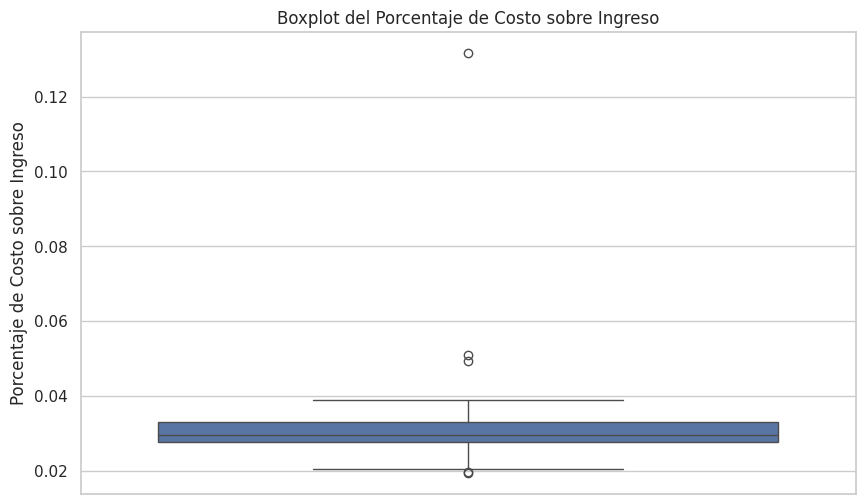

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns

# Armar Boxplot para identificar dispersiones y posibles outliers
plt.figure(figsize=(10,6))
sns.boxplot(y=merged_df['porcentaje_costo_sobre_ingreso'])
plt.title('Boxplot del Porcentaje de Costo sobre Ingreso')
plt.ylabel('Porcentaje de Costo sobre Ingreso')
plt.show()


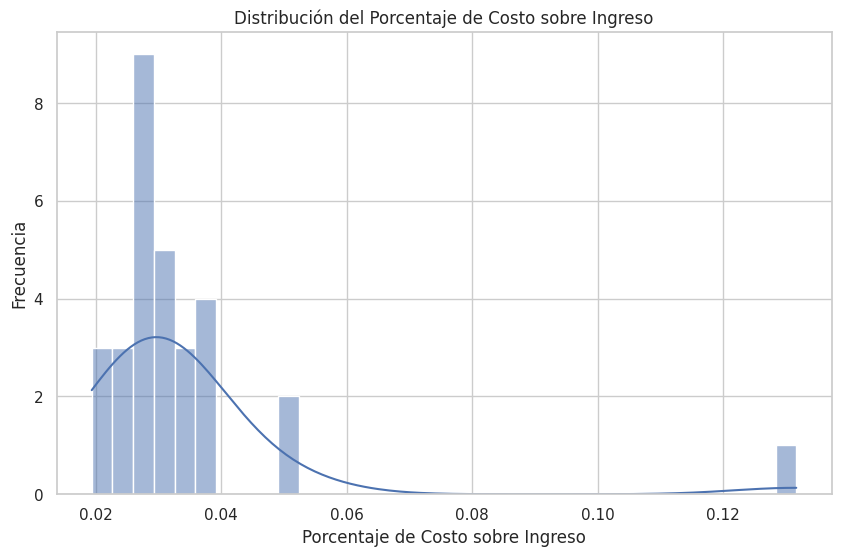

In [161]:
# Histograma para ver la distribución
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['porcentaje_costo_sobre_ingreso'], kde=True)
plt.title('Distribución del Porcentaje de Costo sobre Ingreso')
plt.xlabel('Porcentaje de Costo sobre Ingreso')
plt.ylabel('Frecuencia')
plt.show()

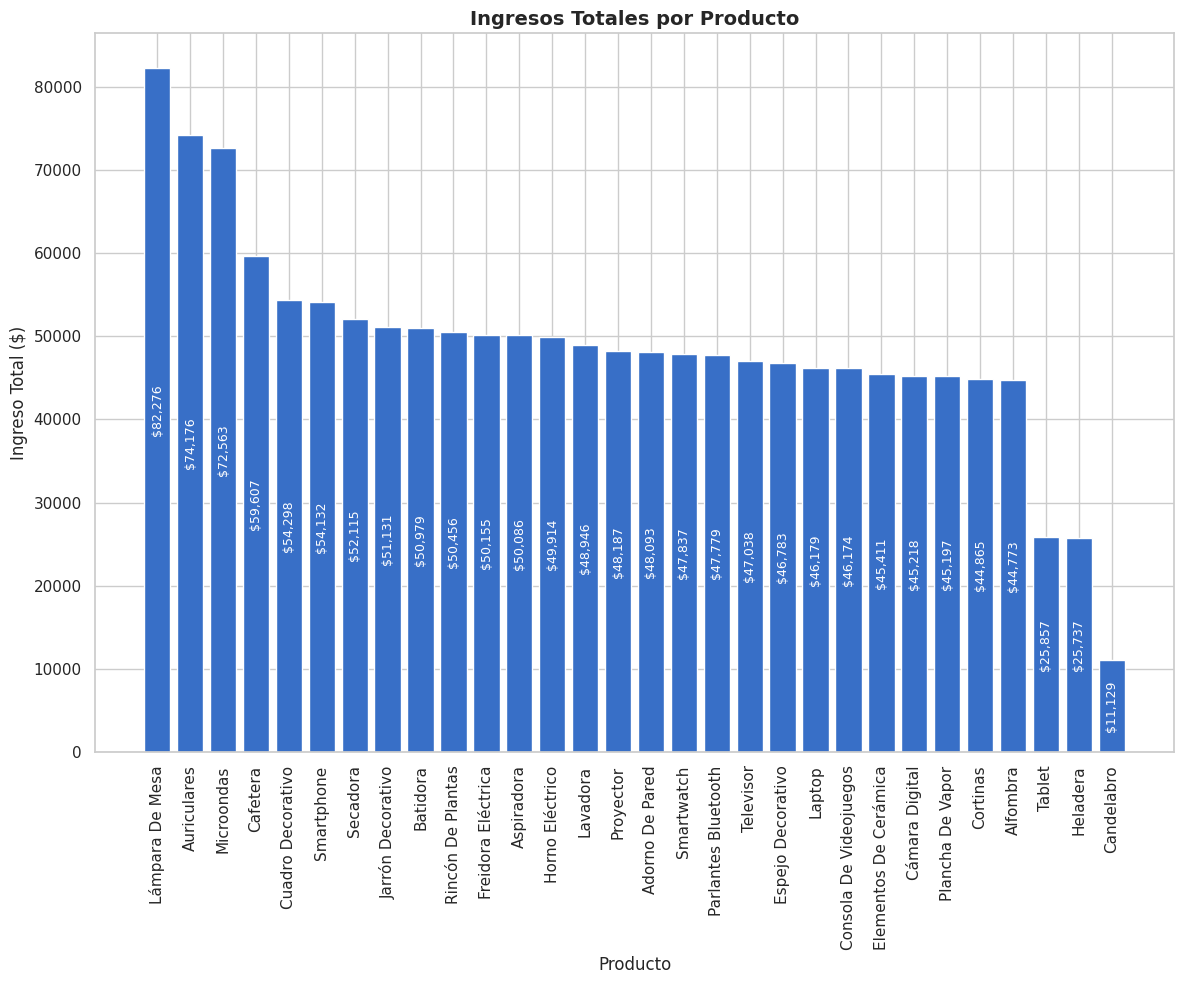

In [162]:
#Etapa 3: medidas de tendencia central

#df = ventas_top.copy()
df = resumen_prod.copy()
#df = resumen_cant.copy()
# =========================================
# 📊 Gráfico de barras con etiquetas verticales dentro de cada barra
# =========================================

# Ordenamos el DataFrame por la columna "ingreso_total" de mayor a menor
df_ordenado = df.sort_values("ingreso_total", ascending=False)

# Creamos la figura donde se va a dibujar el gráfico
plt.figure(figsize=(12, 10))
color_celeste = "#386FC7"

barras = plt.bar(df_ordenado["producto"], df_ordenado["ingreso_total"], color=color_celeste)

# Agregamos un título al gráfico con tamaño de fuente 14 y en negrita
plt.title("Ingresos Totales por Producto", fontsize=14, weight="bold")

# Etiquetamos los ejes
plt.xlabel("Producto", fontsize=12)        # Eje X
plt.ylabel("Ingreso Total ($)", fontsize=12)  # Eje Y

# Rotamos las etiquetas del eje X para que los nombres de los productos se lean bien
plt.xticks(rotation=90)

# Recorremos cada barra dibujada para agregar el valor de ingreso dentro de ella
for barra in barras:
    # Obtenemos la altura de la barra (equivale al valor de ingreso_total)
    y = barra.get_height()

    # Escribimos el texto dentro de la barra
    plt.text(
        barra.get_x() + barra.get_width() / 2,  # posición horizontal: centro de la barra
        y / 2,                                  # posición vertical: mitad de la barra
        f"${y:,.0f}",                           # texto formateado con separador de miles
        ha='center',                            # alineación horizontal centrada
        va='center',                            # alineación vertical centrada
        fontsize=9,                             # tamaño de fuente pequeño
        color="white",                          # texto blanco para contrastar con el celeste
        rotation=90                             # rotamos el texto 90° para que quede vertical
    )

# Ajustamos automáticamente los márgenes del gráfico para que no se corte nada
plt.tight_layout()

# Mostramos el gráfico final
plt.show()


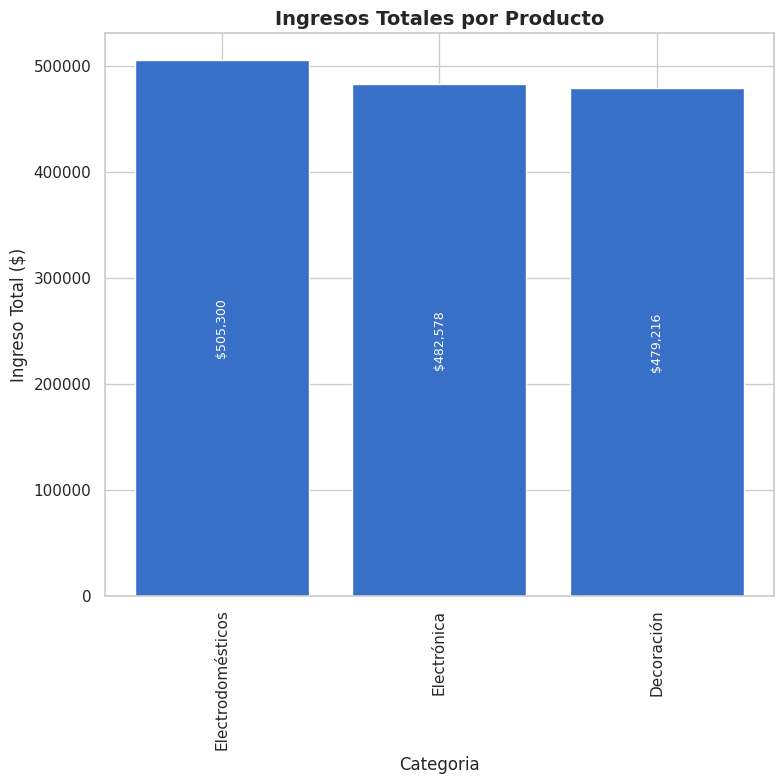

In [163]:
df_cat = resumen_cat.copy()
# =========================================
# Gráfico de barras con etiquetas verticales dentro de cada barra
# =========================================

# Ordenamos el DataFrame por la columna "ingreso_total" de mayor a menor
df_ordenado = df_cat.sort_values("ingreso_total", ascending=False)

plt.figure(figsize=(8, 8))

color_celeste = "#386FC7"

# Eje X → nombre de producto
# Eje Y → ingreso total

barras = plt.bar(df_ordenado["categoria"], df_ordenado["ingreso_total"], color=color_celeste)

# Agregamos un título al gráfico con tamaño de fuente 14 y en negrita
plt.title("Ingresos Totales por Producto", fontsize=14, weight="bold")

# Etiquetamos los ejes
plt.xlabel("Categoria", fontsize=12)        # Eje X
plt.ylabel("Ingreso Total ($)", fontsize=12)  # Eje Y

# Rotamos las etiquetas del eje X para que los nombres de los productos se lean bien
plt.xticks(rotation=90)

# Recorremos cada barra dibujada para agregar el valor de ingreso dentro de ella
for barra in barras:
    # Obtenemos la altura de la barra (equivale al valor de ingreso_total)
    y = barra.get_height()

    # Escribimos el texto dentro de la barra
    plt.text(
        barra.get_x() + barra.get_width() / 2,  # posición horizontal: centro de la barra
        y / 2,                                  # posición vertical: mitad de la barra
        f"${y:,.0f}",                           # texto formateado con separador de miles
        ha='center',                            # alineación horizontal centrada
        va='center',                            # alineación vertical centrada
        fontsize=9,                             # tamaño de fuente pequeño
        color="white",                          # texto blanco para contrastar con el celeste
        rotation=90                             # rotamos el texto 90° para que quede vertical
    )

# Ajustamos automáticamente los márgenes del gráfico para que no se corte nada
plt.tight_layout()

# Mostramos el gráfico final
plt.show()

In [164]:
media = df['ingreso_total'].mean()
mediana = df['ingreso_total'].median()
moda = df['ingreso_total'].mode()

print("Media:", media)
print("Mediana:", mediana)
print("Moda:")
print(moda)

Media: 48903.117333333335
Mediana: 48140.244999999995
Moda:
0      11128.8
1      25736.8
2     25856.57
3     44773.06
4     44865.03
5     45196.63
6     45217.96
7     45411.09
8     46174.41
9     46179.48
10    46783.31
11    47038.04
12    47779.46
13    47836.86
14    48093.49
15     48187.0
16    48946.44
17     49913.9
18    50085.86
19    50155.15
20    50456.45
21     50979.2
22    51130.88
23    52115.45
24    54132.44
25     54297.6
26    59607.31
27    72562.89
28    74175.58
29    82276.38
Name: ingreso_total, dtype: Float64


In [165]:
rango = df['ingreso_total'].max() - df['ingreso_total'].min()
varianza = df['ingreso_total'].var(ddof=1)
desviacion = df['ingreso_total'].std(ddof=1)

print("Rango:", rango)
print("Varianza:", varianza)
print("Desviación estándar:", desviacion)

print(f"Media de Ingreso Total: {media:,.2f}")
print(f"Mediana de Ingreso Total: {mediana:,.2f}")
print(f"Desviación Estándar de Ingreso Total: {desviacion:,.2f}")
print(f"Rango de Ingreso Total: {rango:,.2f}")

Rango: 71147.58
Varianza: 175975127.6254547
Desviación estándar: 13265.561715413889
Media de Ingreso Total: 48,903.12
Mediana de Ingreso Total: 48,140.24
Desviación Estándar de Ingreso Total: 13,265.56
Rango de Ingreso Total: 71,147.58


In [166]:
q1 = df['ingreso_total'].quantile(0.25)
q2 = df['ingreso_total'].quantile(0.5)
q3 = df['ingreso_total'].quantile(0.75)
iqr = q3 - q1

print("Q1:", q1)
print("Mediana (Q2):", q2)
print("Q3:", q3)
print("IQR:", iqr)

Q1: 45601.92
Mediana (Q2): 48140.244999999995
Q3: 51092.96
IQR: 5491.040000000001


In [167]:
#Detección de outliers

lim_inf = q1 - 1.5 * iqr
lim_sup = q3 + 1.5 * iqr

outliers = df[(df['ingreso_total'] < lim_inf) | (df['ingreso_total'] > lim_sup)]

print("Límite inferior:", lim_inf)
print("Límite superior:", lim_sup)
print("\nOutliers detectados:")
print(outliers)

Límite inferior: 37365.36
Límite superior: 59329.520000000004

Outliers detectados:
           producto  ingreso_total  unidades  precio_promedio  registros
3       Auriculares       74175.58       958        76.302727        143
5          Cafetera       59607.31       765        79.046581        117
6        Candelabro        11128.8       160        74.595417         24
14         Heladera        25736.8       330        74.127708         48
19  Lámpara De Mesa       82276.38      1112        72.720625        176
20       Microondas       72562.89       912        79.176000        135
28           Tablet       25856.57       374        71.382586         58


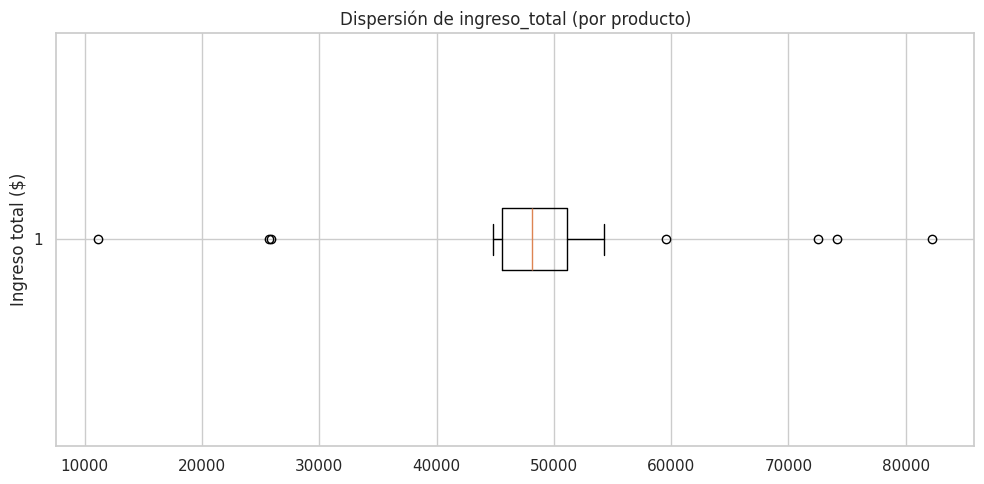

In [168]:
#Etapa 3: EDA

# =========================================
# Boxplot: dispersión de ingreso_total (por producto)
# =========================================

vals = resumen_prod['ingreso_total'].dropna()  # tomamos valores numéricos y quitamos NaN

plt.figure(figsize=(10, 5))                     # tamaño del gráfico
plt.boxplot(vals, vert=False)                   # dibujamos boxplot vertical
plt.title('Dispersión de ingreso_total (por producto)')  # título
plt.ylabel('Ingreso total ($)')                # etiqueta del eje Y
plt.tight_layout()                              # ajustar márgenes
plt.show()                                      # mostrar gráfico

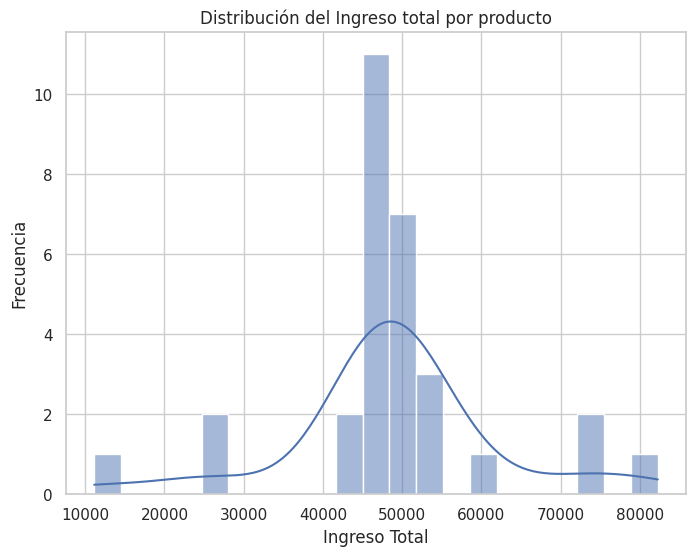

In [169]:
# Histograma
plt.figure(figsize=(8, 6))
sns.histplot(vals, kde=True)
plt.title('Distribución del Ingreso total por producto')
plt.xlabel('Ingreso Total')
plt.ylabel('Frecuencia')
plt.show()

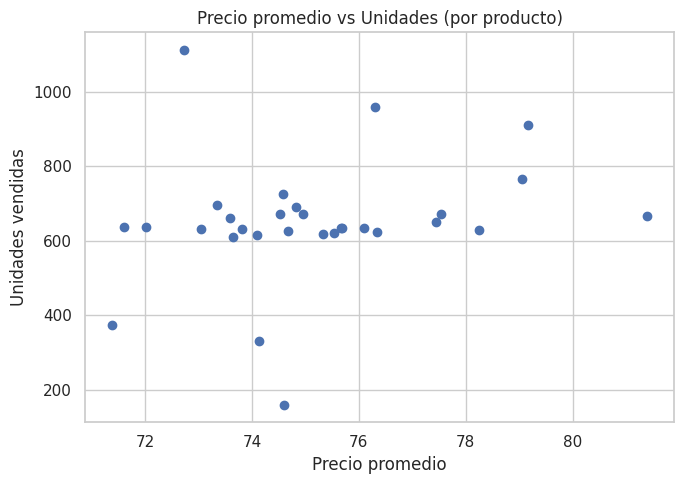

In [170]:
#Etapa 3: correlación
# =========================================
# 🔵 Dispersión: precio_promedio vs unidades (por producto)
# =========================================

x = resumen_prod['precio_promedio']  # eje X: precio promedio por producto
y = resumen_prod['unidades']         # eje Y: unidades vendidas por producto

plt.figure(figsize=(7, 5))           # tamaño del gráfico
plt.scatter(x, y)                    # gráfico de puntos
plt.title('Precio promedio vs Unidades (por producto)')  # título
plt.xlabel('Precio promedio')        # etiqueta eje X
plt.ylabel('Unidades vendidas')      # etiqueta eje Y
plt.tight_layout()                   # ajustar márgenes
plt.show()                           # mostrar


In [171]:
# =========================================
# Coeficiente de correlación de Pearson (precio_promedio vs unidades)
# =========================================

# Calculamos el coeficiente de correlación de Pearson con pandas (método corr)
corr_val = resumen_prod[['precio_promedio','unidades']].corr().loc['precio_promedio','unidades']

print(f"Coeficiente de correlación (Pearson): {corr_val:.3f}")
# Interpretación simple:
if corr_val > 0.8:
    print("Interpretación: relación positiva clara (a mayor precio_promedio, suelen venderse más unidades).")
elif corr_val > 0.2:
    print("Interpretación: relación positiva débil a moderada.")
elif corr_val < -0.8:
    print("Interpretación: relación negativa clara (a mayor precio_promedio, suelen venderse menos unidades).")
elif corr_val < -0.3:
    print("Interpretación: relación negativa débil a moderada.")
else:
    print("Interpretación: relación muy débil o nula.")

Coeficiente de correlación (Pearson): 0.217
Interpretación: relación positiva débil a moderada.


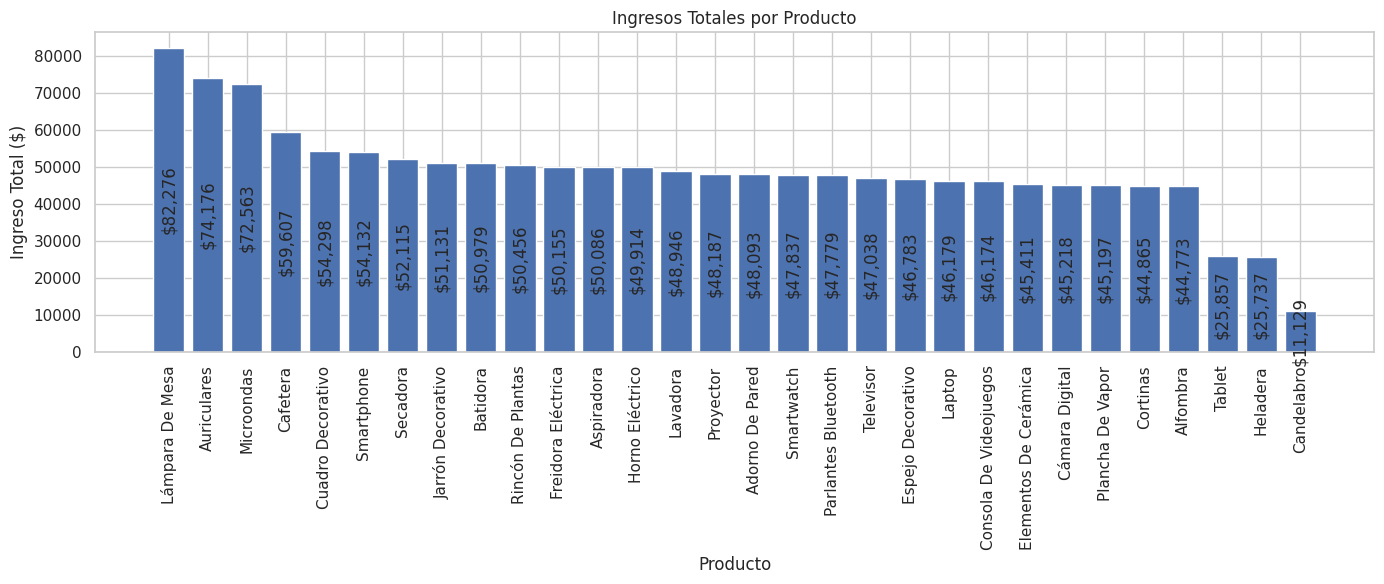

In [172]:
#Etapa 4: visualización con Matplotlib

# =========================================
# Barras: ingresos por producto (Matplotlib)
# =========================================

import matplotlib.pyplot as plt  # importamos la librería de gráficos

df = resumen_prod.copy()                                # copiamos para no modificar el original
df_ordenado = df.sort_values('ingreso_total', ascending=False)  # ordenamos desc por ingreso

plt.figure(figsize=(14, 6))                             # tamaño del gráfico
barras = plt.bar(df_ordenado['producto'], df_ordenado['ingreso_total'])  # dibujamos las barras

plt.title('Ingresos Totales por Producto')              # título del gráfico
plt.xlabel('Producto')                                  # etiqueta eje X
plt.ylabel('Ingreso Total ($)')                         # etiqueta eje Y
plt.xticks(rotation=90)                                  # rotamos etiquetas del eje X para legibilidad

# Etiquetamos el valor dentro de cada barra (texto vertical)
for b in barras:
    h = b.get_height()                                  # altura de la barra (valor)
    x_c = b.get_x() + b.get_width()/2                   # centro horizontal de la barra
    plt.text(x_c, h/2, f"${h:,.0f}", ha='center', va='center', rotation=90)  # texto dentro, vertical

plt.tight_layout()                                      # ajustar márgenes
plt.show()                                              # mostrar gráfico

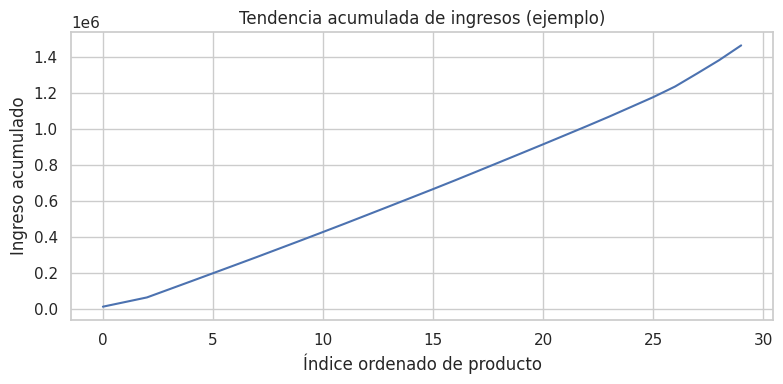

In [173]:
# =========================================
# Gráfico de líneas
# =========================================


import matplotlib.pyplot as plt
import numpy as np

valores = resumen_prod['ingreso_total'].sort_values().values  # tomamos ingresos ordenados
acum = np.cumsum(valores)                                     # acumulado simple (ejemplo)

plt.figure(figsize=(8, 4))   # tamaño del gráfico
plt.plot(acum)               # línea simple
plt.title('Tendencia acumulada de ingresos (ejemplo)')
plt.xlabel('Índice ordenado de producto')
plt.ylabel('Ingreso acumulado')
plt.tight_layout()
plt.show()


In [174]:
# Agrupamos las ventas por fecha y sumamos los ingresos de cada día
# Convertimos la columna 'fecha_venta' a tipo datetime (por seguridad)
ventas_perf['fecha_venta'] = pd.to_datetime(ventas_perf['fecha_venta'], errors='coerce')
ingresos_por_dia = ventas_perf.groupby('fecha_venta')['ingreso'].sum().sort_index()
print(ingresos_por_dia.head(160))

ingresos_acumulados = ingresos_por_dia.cumsum()
print(ingresos_acumulados)

fecha_venta
2024-01-02    3751.26
2024-01-03    3601.84
2024-01-04    5241.78
2024-01-05    4758.53
2024-01-06     2899.6
               ...   
2024-06-05    3357.26
2024-06-06    4107.55
2024-06-07    2389.56
2024-06-08    6433.07
2024-06-09    2260.46
Name: ingreso, Length: 160, dtype: Float64
fecha_venta
2024-01-02       3751.26
2024-01-03        7353.1
2024-01-04      12594.88
2024-01-05      17353.41
2024-01-06      20253.01
                 ...    
2024-12-26    1451156.47
2024-12-27    1453820.73
2024-12-28    1457006.58
2024-12-29    1461227.29
2024-12-30    1467093.52
Name: ingreso, Length: 364, dtype: Float64


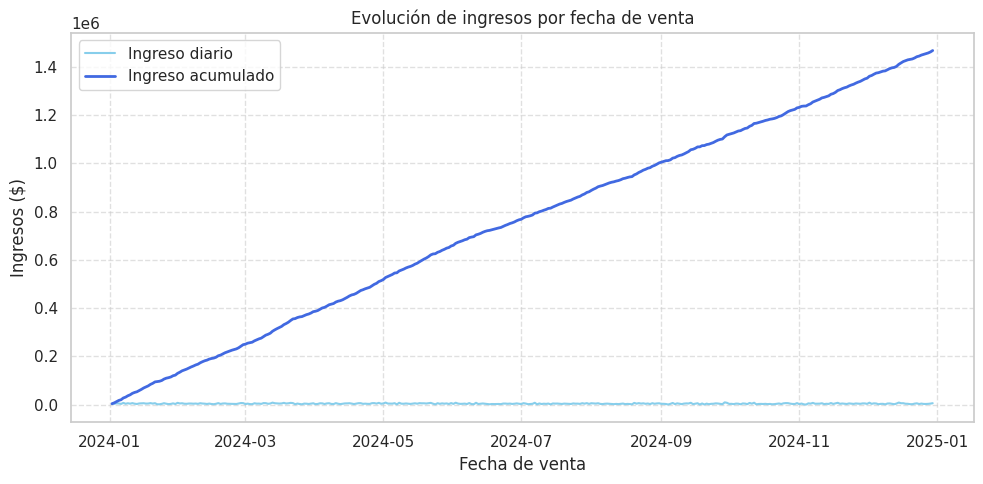

In [175]:
# =========================================
# Tendencia real de ingresos a lo largo del tiempo
# =========================================
# Usamos el dataset 'ventas_perf', que contiene la fecha y el ingreso de cada registro.

import matplotlib.pyplot as plt
import pandas as pd

# Convertimos la columna 'fecha_venta' a tipo datetime (por seguridad)
ventas_perf['fecha_venta'] = pd.to_datetime(ventas_perf['fecha_venta'], errors='coerce')

# Agrupamos las ventas por fecha y sumamos los ingresos de cada día
ingresos_por_dia = ventas_perf.groupby('fecha_venta')['ingreso'].sum().sort_index()

# Calculamos el acumulado de ingresos
ingresos_acumulados = ingresos_por_dia.cumsum()

# Graficamos ambas curvas: ingresos diarios y acumulados
plt.figure(figsize=(10,5))

# Línea 1: ingresos diarios
plt.plot(ingresos_por_dia, color='skyblue', label='Ingreso diario')

# Línea 2: ingresos acumulados
plt.plot(ingresos_acumulados, color='royalblue', label='Ingreso acumulado', linewidth=2)

# Personalización del gráfico
plt.title('Evolución de ingresos por fecha de venta')
plt.xlabel('Fecha de venta')
plt.ylabel('Ingresos ($)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 🧠 Interpretación:
# - La línea celeste muestra los ingresos de cada día.
# - La línea azul muestra el crecimiento acumulado total.
# Si la curva acumulada es ascendente constante → ventas estables.
# Si aparecen saltos abruptos → picos de venta (promociones o campañas de márketing).

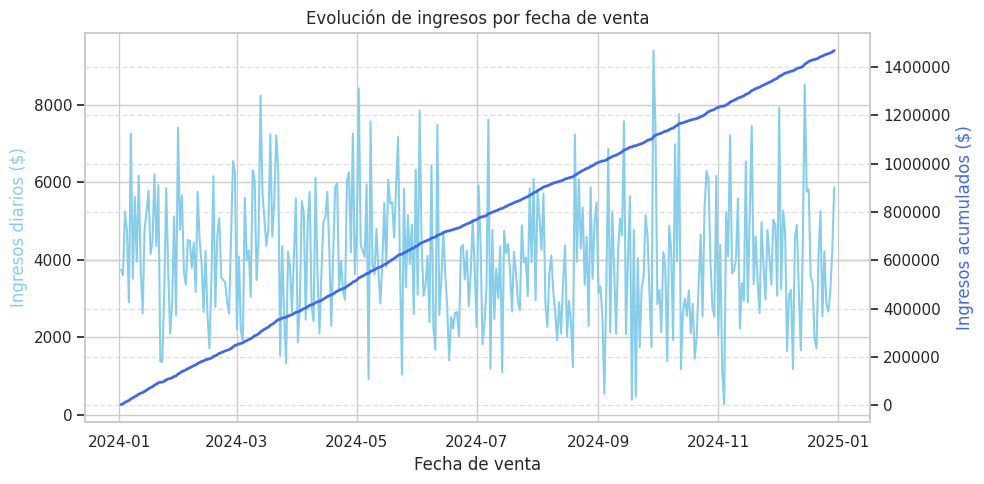

In [176]:
# Tendencia real de ingresos a lo largo del tiempo
import matplotlib.pyplot as plt
import pandas as pd
fig, ax1 = plt.subplots(figsize=(10, 5))
#eje izquierdo ingresos diarios
ax1.plot(ingresos_por_dia, color='skyblue', label='Ingreso diario')
ax1.set_xlabel('Fecha de venta')
ax1.set_ylabel('Ingresos diarios ($)', color='skyblue')
ax1.ticklabel_format(style='plain', axis= 'y')

#eje derecho que son los ingresos acumulados
ax2 = ax1.twinx()
ax2.plot(ingresos_acumulados, color='royalblue', label='Ingreso acumulado', linewidth=2)
ax2.set_ylabel('Ingresos acumulados ($)', color='royalblue')
ax2.ticklabel_format(style='plain', axis= 'y')
# Personalización del gráfico
plt.title('Evolución de ingresos por fecha de venta')

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


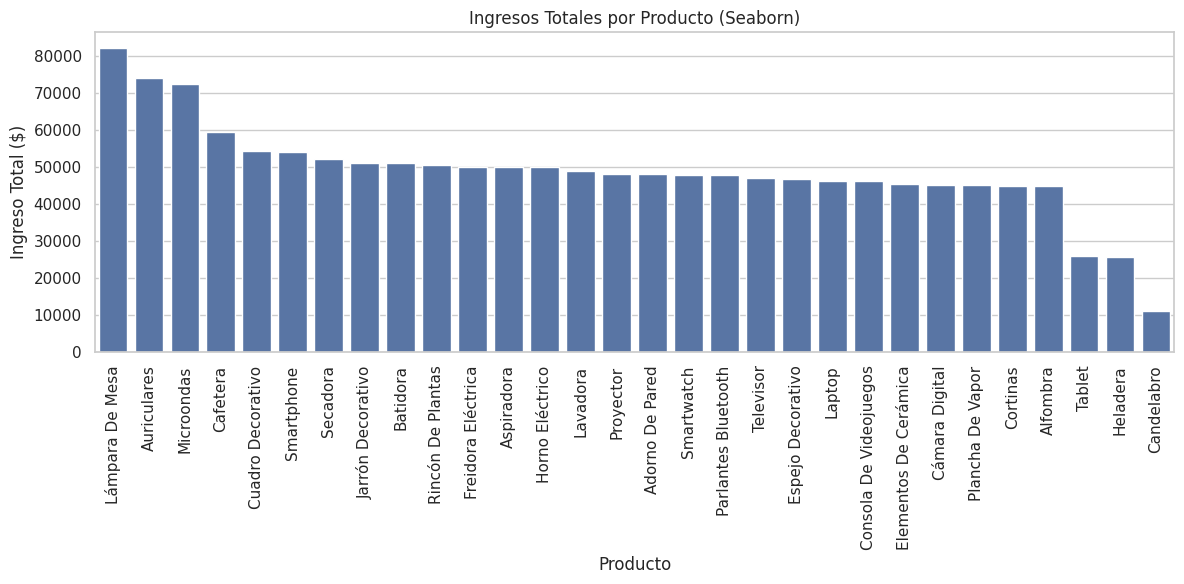

In [177]:
#Etapa 4: Seaborn
# =========================================
# Seaborn: barras ordenadas y boxplot por categoría
# =========================================

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")      # estilo claro por defecto

# Barras ordenadas (Seaborn)
df = resumen_prod.sort_values('ingreso_total', ascending=False)  # ordenamos
plt.figure(figsize=(12, 6))                                      # tamaño
ax = sns.barplot(data=df, x='producto', y='ingreso_total')       # barras
ax.set_title('Ingresos Totales por Producto (Seaborn)')          # título
ax.set_xlabel('Producto'); ax.set_ylabel('Ingreso Total ($)')    # etiquetas
plt.xticks(rotation=90)                                          # rotamos etiquetas
plt.tight_layout(); plt.show()                                   # mostrar


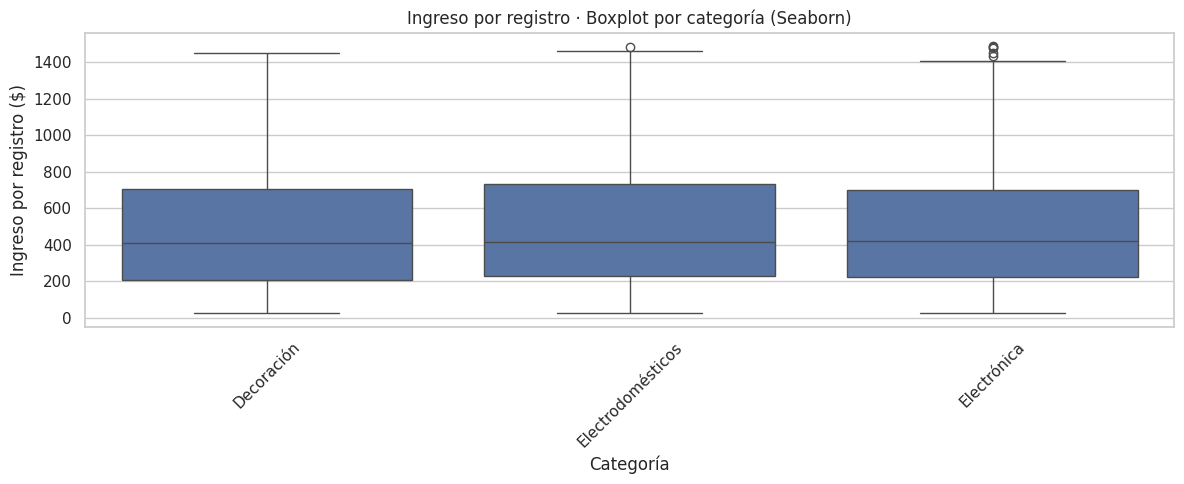

In [178]:
# Boxplot por categoría (ingreso por registro)
plt.figure(figsize=(12, 5))                                      # tamaño
ax = sns.boxplot(data=ventas_perf, x='categoria', y='ingreso')   # boxplot
ax.set_title('Ingreso por registro · Boxplot por categoría (Seaborn)')  # título
ax.set_xlabel('Categoría'); ax.set_ylabel('Ingreso por registro ($)')   # etiquetas
plt.xticks(rotation=45)                                          # rotamos etiquetas
plt.tight_layout(); plt.show()                                   # mostrar